In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation

In [14]:
# Erstellen eines einfachen CNN-Modells
model = Sequential()

In [15]:
# Hinzufügen einer Convolutional-Schicht
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
# Hinzufügen einer ReLU-Aktivierungsfunktion
model.add(Activation('relu'))

In [17]:
# Hinzufügen weiterer Schichten
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

In [18]:
# Ausgabeschicht
model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
# Modell kompilieren
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Modellzusammenfassung anzeigen
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_3 (Activation)       │ (None, 26, 26, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 64)                │  1,384,512 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_4 (Activation)       │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 10)                │        650 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_5 (Activation)       │ (None, 10)                │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,385,482 (5.29 MB)

 Trainable params: 1,385,482 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

# Visualisierung der Aktivierungsfunktion

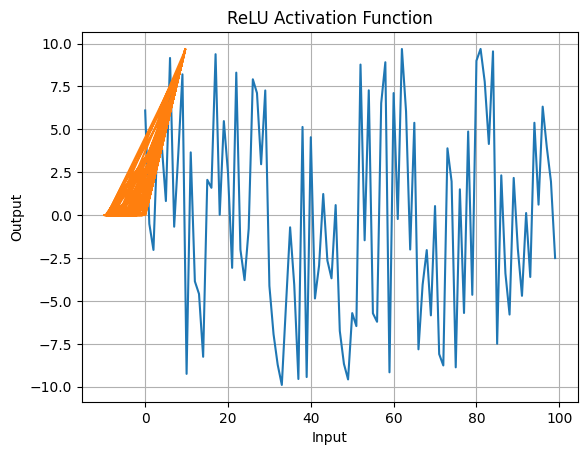

In [25]:
# Generate a random sequence of scattered values
x_values = np.random.rand(100) * 20 - 10
plt.plot(x_values) # Plot the values

y_values = relu(x_values)

# Create the plot
plt.plot(x_values, y_values)
plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()


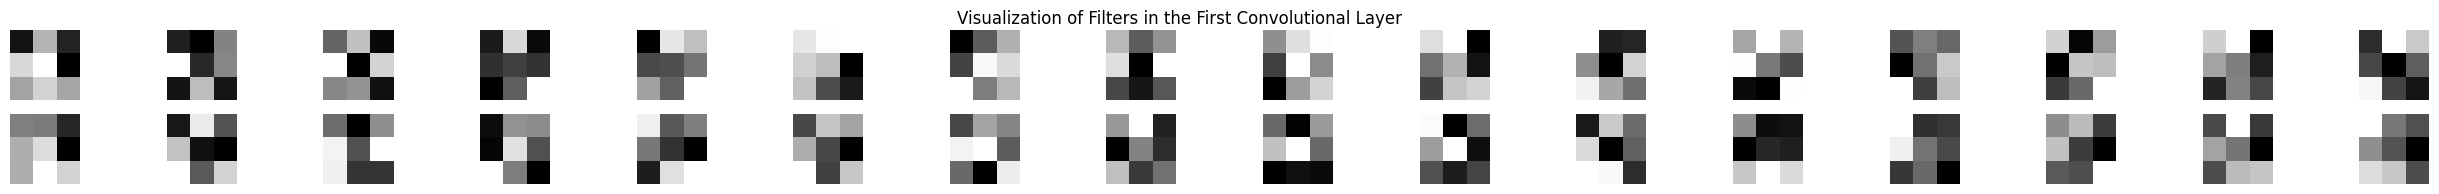

In [22]:
# Gewichte der ersten Convolutional-Schicht extrahieren
weights = model.layers[0].get_weights()[0]

# Bestimmen der Anzahl der Filter
num_filters = weights.shape[-1]

# Erstellen einer Figure zur Visualisierung der Filter
plt.figure(figsize=(num_filters, 2))

for i in range(num_filters):
    # Extrahieren des i-ten Filters
    filter = weights[:, :, :, i]

    # Normalisierung des Filters für die Visualisierung
    filter = (filter - filter.min()) / (filter.max() - filter.min())

    # Hinzufügen des Filters zur Figure
    plt.subplot(2, num_filters // 2, i+1)
    plt.imshow(filter[:, :, 0], cmap='gray')  # Graustufen für bessere Sichtbarkeit
    plt.axis('off')

plt.suptitle("Visualization of Filters in the First Convolutional Layer")
plt.show()

In [23]:
%pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [24]:
from tensorflow.keras.utils import plot_model

# Speichern der Modellvisualisierung als Bild
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Anzeigen des Bildes
from IPython.display import Image
Image('model_architecture.png')

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


FileNotFoundError: No such file or directory: 'model_architecture.png'

FileNotFoundError: No such file or directory: 'model_architecture.png'

<IPython.core.display.Image object>